# Introduction to deep learning for computer vision

## Import packages

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

## Import MNIST DataSet

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Do some sanity check on the data**
- what is the shape of train and test set and the corresponding labels?
- How many data points are there in train and test set?
- What is the range of labels? Are they one hot encoded or they are just numbers?
- Print a sample data point from train
- show the sample datapoint with `imshow` (pass cmap="gray" argument to see the image in black and white)  

In [ ]:
#TODO: your sanity checks for imported dataset

## Data preprocessing

In [ ]:
# Reshape the training images to have a shape of (60000, 28, 28, 1),
# where 60000 is the number of images,
# 28x28 is the image size,
# and 1 represents the single color channel (grayscale).
train_images = train_images.reshape((60000, 28, 28, 1))

# Convert pixel values from integers (0-255) to floating-point numbers (0.0-1.0)
# for better model performance.
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of training samples: 60000
Number of test samples: 10000
Unique labels: {np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}
Are labels one-hot encoded? False
Sample label: 5
Sample image data:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0  

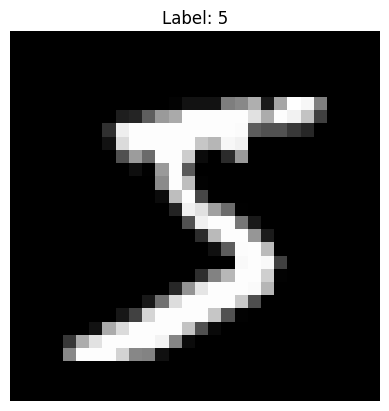

In [3]:
# Shapes of datasets
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Number of data points
print("Number of training samples:", len(train_images))
print("Number of test samples:", len(test_images))

# Range and type of labels
print("Unique labels:", set(train_labels))
print("Are labels one-hot encoded?", train_labels.ndim != 1)

# Print a sample data point (image + label)
sample_index = 0
print("Sample label:", train_labels[sample_index])
print("Sample image data:\n", train_images[sample_index])

# Show the sample datapoint as image
plt.imshow(train_images[sample_index], cmap="gray")
plt.title(f"Label: {train_labels[sample_index]}")
plt.axis('off')
plt.show()


## Part A: Introduction to convnets

**Visualizing the conv operarion 3-chanel images**
- image size = (5 x 5 x 3)
- kernel_size = 3
- stride = 1
- padding = no padding

In [4]:
from IPython.display import display, HTML

gif_url = "https://raw.githubusercontent.com/PyDataGBC/PyML2025/main/LabWeek11/assets/Conv2d_0p_1s_3inCh.gif"
display(HTML(f'<img src="{gif_url}" width="600" height="400">'))  # Adjust size as needed

**Instantiating a small convnet**




![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek11/assets/image.png)

**Note:** Suppose n1=32 and n2=64

**We can instantiate the model in TensorFlow in two ways.**

**Approach 1: Sequential API**

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Approach 2: Functioanl API**
- In Keras' functional API, each layer acts like a function that transforms an `input` tensor.
- When you pass inputs through multiple layers, Keras records the entire sequence of transformations.
- `model = keras.Model(inputs, outputs)` connects the dots, forming a complete model from `inputs` to `outputs`.

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

# each layer acts like a function
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=5, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Sequential API is easier however with functioal API non-Sequential Connections Allowed: You can create models with branches, residual connections (like ResNet), or multi-input/multi-output structures.

**Displaying the model's summary**

In [8]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,346 (243.54 KB)

 Trainable params: 62,346 (243.54 KB)

 Non-trainable params: 0 (0.00 B)

**Instantiate your own model with the following architecture and then display the summary of the model**

- Input layer
- Conv2D with `filter`=32 and `kernel_size`=3
- MaxPooling2d with `pool_size`=2
- Conv2D with `filter`=64 and `kernel_size`=3
- MaxPooling2d with `pool_size`=2
- Conv2D with `filter`=128 and `kernel_size`=3
- Flatten layer
- Output layer (for 10 classes)

**Note:** Use functioal API to define your model


In [10]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)




In [11]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling and Training the convnet on MNIST images**

**Note 1:** Use `loss="sparse_categorical_crossentropy"`

**Note 2:** Train for 5 `epochs` with `batch_size`=64

In [12]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8688 - loss: 1.1652 - val_accuracy: 0.9817 - val_loss: 0.0581
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9836 - loss: 0.0540 - val_accuracy: 0.9815 - val_loss: 0.0635
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - loss: 0.0363 - val_accuracy: 0.9862 - val_loss: 0.0526
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9898 - loss: 0.0313 - val_accuracy: 0.9857 - val_loss: 0.0624
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9913 - loss: 0.0257 - val_accuracy: 0.9882 - val_loss: 0.0485


**Evaluating the convnet**

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9824 - loss: 0.0596
Test accuracy: 0.987


## Part B: Training a convnet from scratch on a small dataset

**In this [Kaggle competition](https://www.kaggle.com/c/dogs-vs-cats/overview), you'll write an algorithm to classify whether images contain either a dog or a cat (binary classification - 0: Cat, 1: Dog).**

**Try to get the accuracy above 80%**

### Downloading the data

We need to load `kaggle.json` (your Kaggle API key file). This is necessary to configure the Kaggle API for downloading datasets or interacting with Kaggle from the command line.

**TODO:** Get your API key from Kaggle

**Steps to Download `kaggle.json`**
1. Go to [Kaggle](https://www.kaggle.com/)

    - Visit Kaggle and log in to your account.

2. Go to API Settings

    - Click on your profile picture (top-right corner).
    - Select `Setting` from the dropdown menu.
    - Select `Account` tab
    - Scroll down to the "API" section.

3. Download API Key

  - Click "Create New API Token" (or "Generate New Token" if you already have one). This will download a file named kaggle.json to your computer.

In [14]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhruvishkanani","key":"747c42566dfcbd894ff6233be221fc95"}'}

In [18]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


**TODO:** Go to [Dogs Vs Cats competion page](https://www.kaggle.com/c/dogs-vs-cats/overview) and then `Data` tab and **join the competition.**

**Note_1:** It's an important step otherwise you won't be able to download the data.

**Note_2:** You may need to verify your phone number to join the competition. In that case go to `settings` in Kaggle and then verify your phone number.

In [19]:
!kaggle competitions download -c dogs-vs-cats

In [20]:
!unzip -qq dogs-vs-cats.zip

In [21]:
!unzip -qq train.zip

### Data preprocessing (For this section just run the cells)

**Copying images to training, validation, and test directories**

In [22]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

**Using `image_dataset_from_directory` to read images**

In [23]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Displaying the the data and labels yielded by the `Dataset`

`train_dataset`, `validation_dataset`, and `test_dataset` behave like a **generator** in the sense that it **yields data lazily** when iterated over, instead of loading everything into memory at once.

In [24]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    sample_batch = data_batch
    sample_labels = labels_batch
    break # break the for-loop because we just want one batch

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Explain each element of the data batch shape tuple**

your answer: ???


32 – The number of images in the batch (i.e., batch size).

180 – The height of each image (in pixels), resized to 180.

180 – The width of each image (in pixels), resized to 180.

3 – The number of color channels. Since these are RGB images, there are 3 channels (Red, Green, Blue).

label tf.Tensor(1, shape=(), dtype=int32)


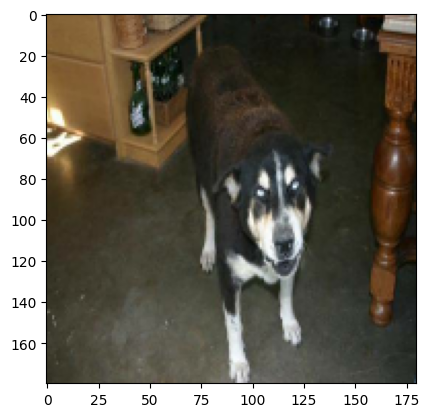

In [25]:
print("label", sample_labels[10])
plt.imshow(sample_batch[10].numpy().astype("uint8"))

**TODO: Visualize some other samples from the batch with their corresponding labels.**

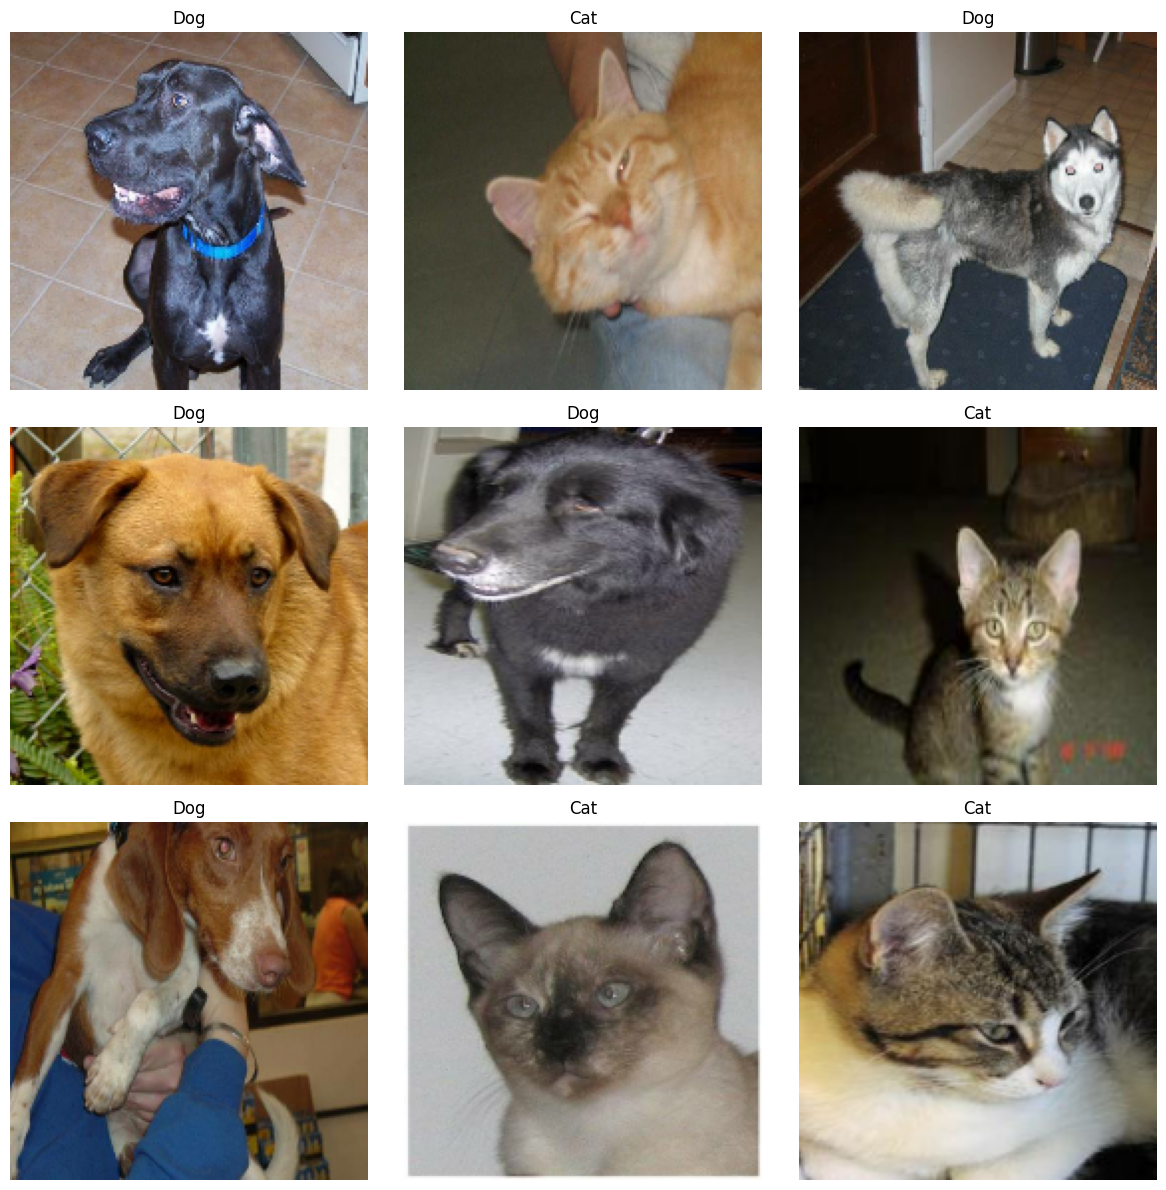

In [26]:
import matplotlib.pyplot as plt

class_names = ["Cat", "Dog"]

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_batch[i].numpy().astype("uint8"))
    label = sample_labels[i].numpy()
    plt.title(class_names[label])
    plt.axis("off")

plt.tight_layout()
plt.show()


### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# ✅ TODO: Conv2D with 64 filters
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

# ✅ TODO: MaxPooling2D
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**

Compile the model for the binary classification task.

**Note:** Make sure you pass `metrics=["accuracy"]` as an argument. Otherwise you get error when you plot the history.

In [28]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


**Fitting the model using a `Dataset`**

In [29]:
#This is a callback that saves the model during training.
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", #The model will be saved to this file.
        save_best_only=True,  # Only saves the model if the validation loss (val_loss) improves
        monitor="val_loss")   # The model checkpointing is based on the validation loss,
                              # whenever val_loss decreases, the model is saved.

]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.4806 - loss: 0.7017 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.4926 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5072 - loss: 0.6930 - val_accuracy: 0.5540 - val_loss: 0.6922
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5220 - loss: 0.6928 - val_accuracy: 0.5630 - val_loss: 0.6753
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5699 - loss: 0.6828 - val_accuracy: 0.5300 - val_loss: 0.6762
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.6015 - loss: 0.6678 - val_accuracy: 0.6470 - val_loss: 0.6193
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.6499 - loss: 0.6335 - val_accuracy: 0.6540 - val_loss: 0.6054
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6545 - loss: 0.6156 - val_accuracy: 0.6740 -

**Displaying curves of loss and accuracy during training**

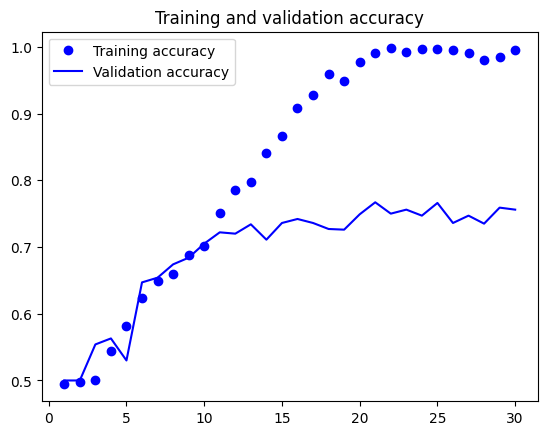

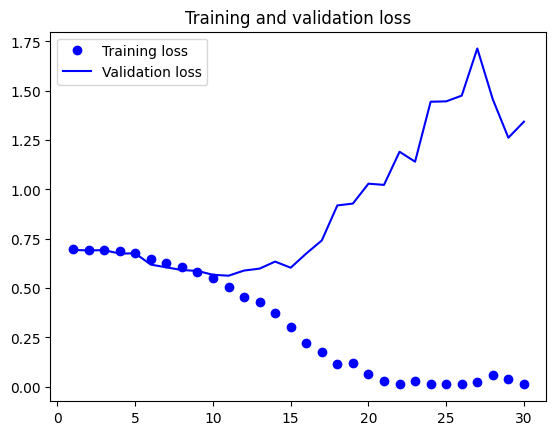

In [30]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [31]:
test_model = keras.models.load_model("convnet_from_scratch.keras")

#TODO: Evaluate the test_model
test_loss, test_acc = test_model.evaluate(test_dataset)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7030 - loss: 0.5917
Test Accuracy: 0.7095
Test Loss: 0.5876


- **What is your test accuracy?**

- **Does you model overfit?**

you answer: ???

### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [32]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

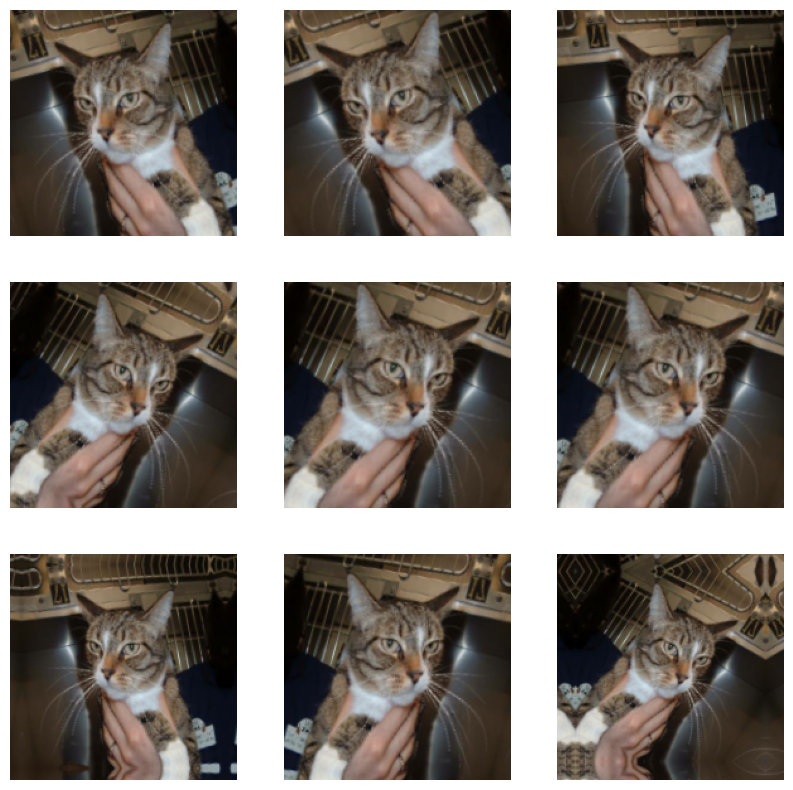

In [33]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset:
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
    break

**Defining a new convnet that includes image augmentation and dropout**

In [34]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)         #This line is new - add more data to prevent overfitting
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)            #This line is new - to prevent overfitting
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

Train the new model for 100 epochs and save it in `convnet_from_scratch_with_augmentation.keras` path.

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.4963 - loss: 0.7124 - val_accuracy: 0.5310 - val_loss: 0.6922
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5214 - loss: 0.6943 - val_accuracy: 0.5590 - val_loss: 0.6862
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5372 - loss: 0.6904 - val_accuracy: 0.6060 - val_loss: 0.6876
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5317 - loss: 0.6930 - val_accuracy: 0.5650 - val_loss: 0.6780
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6194 - loss: 0.6747 - val_accuracy: 0.5090 - val_loss: 0.9589
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.5967 - loss: 0.6879 - val_accuracy: 0.6380 - val_loss: 0.6615
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.6323 - loss: 0.6414 - val_accuracy: 0.6520 - val_loss: 0.6306
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6666 - loss: 0.6099 - val_accuracy: 0.

**Plot curves of loss and accuracy during training**

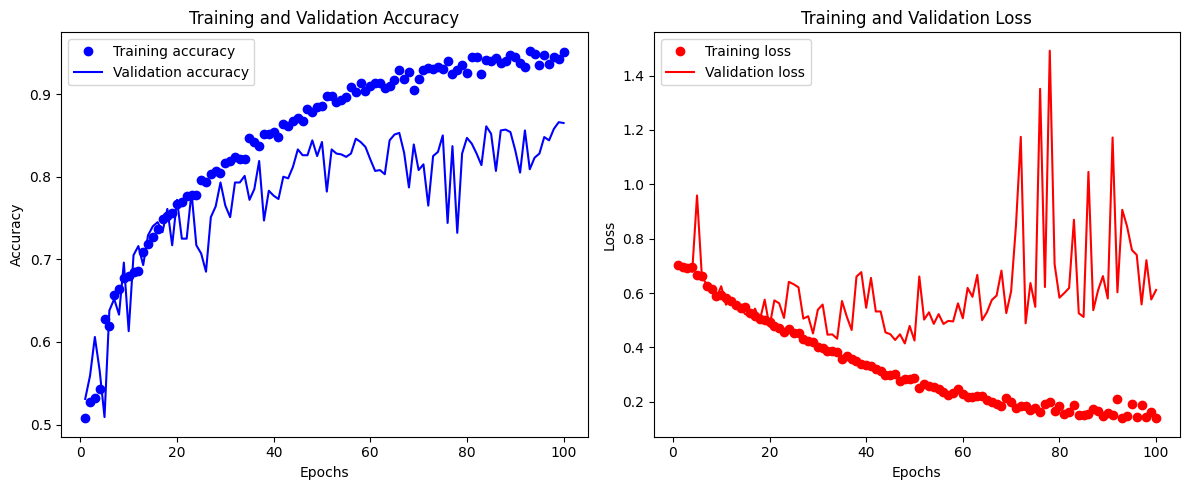

In [36]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


**Evaluating the model on the test set**

In [37]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8316 - loss: 0.4283
Test accuracy: 0.828


**What is your test accuracy after using data augmentation and dropout?**

your answer: ???
0.828